#Modelin Hazırlanması ve Eğitimi

###Ön Hazırlık

In [ ]:
#Kütüphaneler yüklenir
import tensorflow as tf
import os
from matplotlib import pyplot
from google.colab import drive
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
#Spectogramlar verilen linkten drive'a sabitlenir ve kişisel drive colab'a dosya olarak tanımlanır
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Path'ler oluşturulur
path = os.getcwd()
main_path = os.path.join(path, 'gdrive', 'MyDrive')

train_path = os.path.join(main_path, "Preprocess", "train")
validation_path = os.path.join(main_path, "Preprocess", "validation")
test_path = os.path.join(main_path, "Preprocess", "test")

###Modelin Oluşturulması ve Eğitilmesi

In [ ]:
#Ana model tanımlanır
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Train set içeri alınır
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_path,
        color_mode="grayscale",
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 6985 images belonging to 10 classes.


In [ ]:
#Validation set içeri alınır
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    color_mode="grayscale",
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical')

Found 874 images belonging to 10 classes.


In [ ]:
#Model eğitilir
history = model.fit(train_generator, steps_per_epoch=8, epochs=100, validation_data=validation_generator,
                    validation_steps=8, verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 191ms/step - loss: 2.2597 - accuracy: 0.1328 - val_loss: 2.1061 - val_accuracy: 0.2031
Epoch 2/100
8/8 [==============================] - 1s 126ms/step - loss: 2.1415 - accuracy: 0.2617 - val_loss: 2.1073 - val_accuracy: 0.2734
Epoch 3/100
8/8 [==============================] - 1s 125ms/step - loss: 1.9988 - accuracy: 0.2773 - val_loss: 2.0211 - val_accuracy: 0.2344
Epoch 4/100
8/8 [==============================] - 1s 101ms/step - loss: 1.8598 - accuracy: 0.3516 - val_loss: 1.7644 - val_accuracy: 0.3750
Epoch 5/100
8/8 [==============================] - 1s 78ms/step - loss: 1.8923 - accuracy: 0.3477 - val_loss: 1.6930 - val_accuracy: 0.3594
Epoch 6/100
8/8 [==============================] - 1s 126ms/step - loss: 1.7178 - accuracy: 0.3516 - val_loss: 1.6636 - val_accuracy: 0.4062
Epoch 7/100
8/8 [==============================] - 1s 76ms/step - loss: 1.5363 - accuracy: 0.4727 - val_loss: 1.7331 - val_accuracy: 0.3906
Epoch 8/100
8/8

###Performans Metriklerinin İncelenmesi

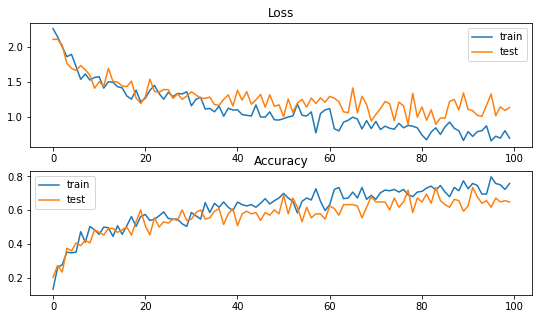

In [ ]:
#Accuracy ve Loss grafikleri oluşturulur
pyplot.figure(figsize=(9, 5))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Test set içeri alınır
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(64, 64),
        color_mode="grayscale",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 873 images belonging to 10 classes.


In [ ]:
#Test datası için model tahminleri oluşturulur
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict(test_generator,steps = nb_samples)

In [ ]:
#Model tahmin sonuçları ve asıl labellar alınır
y_pred = np.argmax(predict, axis=1)
y_true = test_generator.classes

In [ ]:
#Tahmin ve gerçek değerlerin array büyüklükleri kontrol edilir
print(y_pred.shape)
print(y_true.shape)

(873,)
(873,)


In [ ]:
#Confusion matrix oluşturulur
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[67  0  2  0  0 25  0  4  0  2]
 [ 5 29  1  1  2  2  0  1  1  1]
 [ 6  0 59 14  2  5  1  1  4  8]
 [ 0  2  9 75  3  3  0  1  1  6]
 [ 2  1  2  4 61  5  6 10  5  4]
 [11  1  5  1  3 75  0  1  2  1]
 [ 0  0  1  0  0  1 33  0  1  1]
 [ 7  1  1  0  4  6  0 78  0  3]
 [ 2  0 10  1  1  1  1  2 71  4]
 [10  2 17  2  2  2  1  7  2 55]]


In [ ]:
#Precision, Recall ve Specificity için ilgili değerler hesaplanır
TP = np.diag(cm) #true positives
FP = np.sum(cm, axis=0) - TP #false positives
FN = np.sum(cm, axis=1) - TP #false negatives
num_classes = 10
TN = [] #true negatives
for i in range(num_classes):
    temp = np.delete(cm, i, 0)   
    temp = np.delete(temp, i, 1) 
    TN.append(sum(sum(temp)))

print(f"True Positives: {TP} \nFalse Positives: {FP} \nFalse Negatives: {FN}\nTrue Negatives: {TN}")

True Positives: [67 29 59 75 61 75 33 78 71 55] 
False Positives: [43  7 48 23 17 50  9 27 16 30] 
False Negatives: [33 14 41 25 39 25  4 22 22 45]
True Negatives: [730, 823, 725, 750, 756, 723, 827, 746, 764, 743]


In [ ]:
#Her sınıf için Precision, Recall, Specificity ve Sensitivity hesaplanır
precision = np.round((TP/(TP+FP)),2)
recall = np.round((TP/(TP+FN)),2)
f1_score = np.round(2*(precision*recall)/(precision+recall),2)

print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1_score}")

Precision: [0.61 0.81 0.55 0.77 0.78 0.6  0.79 0.74 0.82 0.65]
Recall: [0.67 0.67 0.59 0.75 0.61 0.75 0.89 0.78 0.76 0.55]
F1 Score: [0.64 0.73 0.57 0.76 0.68 0.67 0.84 0.76 0.79 0.6 ]


Anlamak adına pozitif ve negatif olmak üzere iki sınıf üzerinden düşünürsek;

*   Precision: Pozitif tahminlenenler içerisindeki gerçek pozitif yüzdesini ifade eder
*   Recall: Gerçekten pozitif olanlar içerisinde kaç tanesinin doğru (pozitif) tahminlendiğini ifade eder
*   F1 Score: Precision ve Recall'un harmonik ortalamasıdır, ikisinin tek bir metriğe indirgenmesini amaçlar ve dengelenmemiş veri için güzel bir metriktir



###Hiperparametre Optimizasyonu

In [ ]:
#Parametreler değiştirilerek yeni bir model denenir
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])
 
model_new.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adamax(), 
              metrics=['accuracy'])

In [ ]:
#Yeni model eğitilir
history_new = model_new.fit(train_generator, steps_per_epoch=8, epochs=100, validation_data=validation_generator,
                    validation_steps=8, verbose=1)

Performans metrikleri yeni model için incelenir

In [ ]:
#Yeni model - Accuracy ve Loss grafikleri
pyplot.figure(figsize=(9, 5))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history_new.history['loss'], label='train')
pyplot.plot(history_new.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history_new.history['accuracy'], label='train')
pyplot.plot(history_new.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Yeni model - Diğer performans metrikleri
predict_new = model_new.predict(test_generator,steps = nb_samples)
y_pred_new = np.argmax(predict_new, axis=1) #yeni tahminler
cm_new = confusion_matrix(y_true, y_pred_new) #yeni confusion matrix

TP_new = np.diag(cm) #true positives
FP_new = np.sum(cm, axis=0) - TP #false positives
FN_new = np.sum(cm, axis=1) - TP #false negatives
num_classes = 10
TN_new = [] #true negatives
for i in range(num_classes):
    temp = np.delete(cm, i, 0)   
    temp = np.delete(temp, i, 1) 
    TN.append(sum(sum(temp)))

precision = np.round((TP/(TP+FP)),2)
recall = np.round((TP/(TP+FN)),2)
f1_score = np.round(2*(precision*recall)/(precision+recall),2)

print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1_score}")